(plotly:renderers)=
# 图渲染

参考：[Displaying Figures | Python | Plotly](https://plotly.com/python/renderers/)

Plotly 的 Python 图形库 `plotly.py` 为您提供了关于如何以及在何处显示图的广泛选项。

一般来说，有三种不同的方法可以用来显示图：

1. 在脚本或笔记本的上下文中使用渲染器框架
2. 在网络应用中使用 `Dash`
3. 在 `ipywidgets` 上下文中使用 `FigureWidget`

下面将讨论每种方法。

## 使用渲染器框架显示图

渲染器框架是一种灵活的方法，可以在各种上下文中显示 `plot.py` 图。要使用渲染器框架显示图形，可以调用图对象 `.show()` 方法，或将图传递给 `plotly.io.show` 函数。

In [1]:
import plotly.graph_objects as go
go.FigureWidget();

fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

在大多数情况下，您可以省略对 `.show()` 的调用，而允许图形显示自己。

In [2]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displaying Itself"
)
fig

> 准确地说，当以下两个条件为真时，图将使用当前默认渲染器显示自己。首先，单元格中的最后一个表达式必须求值为一个图。其次，`plot.py` 必须在 IPython 内核中运行。

**在许多上下文中，将自动选择适当的呈现程序，您将不需要执行任何附加配置**。这些上下文包括经典的 [Jupyter Notebook](https://jupyter.org/)、[JupyterLab](https://jupyterlab.readthedocs.io/en/stable/)（如果安装了 JupyterLab 扩展）、[Visual Studio Code notebooks](https://code.visualstudio.com/docs/python/jupyter-support)、[谷歌 Collaboration](https://colab.research.google.com/notebooks/intro.ipynb)、[Kaggle](https://www.kaggle.com/kernels) Notebook、[Azure](https://notebooks.azure.com/) Notebook 和 [Python 交互式 shell](https://www.python.org/shell/)。

通过选择兼容的渲染器，包括 [IPython 控制台](https://docs.spyder-ide.org/ipythonconsole.html)、[QtConsole](https://qtconsole.readthedocs.io/en/stable/)、[Spyder](https://www.spyder-ide.org/) 等，可以支持其他上下文。

接下来，我们将展示如何配置默认渲染器。在那之后，我们将描述所有的内置渲染器，并讨论为什么您可能会选择使用它们。

> 注意：`renderers`框架是 `plotly.offline.iplot` 和 `plotly.offline.plot` 函数的泛化，它们是  `plotly.py` 版本 4 之前推荐的显示图形的方法。这些函数已经使用渲染器框架重新实现，并且仍然支持向后兼容性，但是这里不讨论它们。

## 在 Dash 中 Plotly Charts

`Dash` 是使用 Plotly 图形在 Python 中构建分析应用程序的最佳方法。要运行下面的应用程序，请运行 `pip install dash`，点击“下载”获取代码并运行 `python app.py`。

开始于[官方的 Dash文档](https://dash.plotly.com/installation)，并学习如何轻松[风格化](https://plotly.com/dash/design-kit/)和[部署](https://plotly.com/dash/app-manager/)应用程序于这样的 [Dash 企业版](https://plotly.com/dash/)。

In [3]:
from IPython.display import IFrame
snippet_url = 'https://dash-gallery.plotly.host/python-docs-dash-snippets/'
IFrame(snippet_url + 'renderers', width='100%', height=630)

## 设置默认渲染器

当前和可用的**渲染器**使用 `plotly.io.renderers` 配置对象进行配置。显示此对象以查看当前默认渲染器和所有可用渲染器的列表。

In [4]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

在显示 `pio.renderers` 时看到的默认渲染器可能与这里显示的不同。这是因为 `plotly.py` 试图在启动时自动检测适当的渲染程序。通过将可用的渲染器的名称分配给 `pio.renderers.default` 属性，可以更改默认渲染器。例如，要切换到`'browser'`渲染器，它会在默认 web 浏览器的选项卡中打开图，您将运行以下程序。

```{note}
默认渲染器在单个会话期间保持不变，但它们不会跨会话保持不变。如果您在 IPython 内核中工作，这意味着默认渲染器将在内核的生命周期中持久存在，但它们不会在内核重启时持久存在。
```

In [5]:
import plotly.io as pio
pio.renderers.default = "browser"

也可以使用系统环境变量设置默认渲染器。在启动时，`plotly.py` 检查是否存在一个名为 `PLOTLY_RENDERER` 的环境变量。如果将此环境变量设置为可用渲染程序的名称，则将此渲染程序设置为默认设置。

### 覆盖默认渲染器

也可以通过将可用渲染器的名称作为 `renderer` 关键字参数传递给 `show()` 方法来临时覆盖默认渲染器。下面是一个使用 `svg` 渲染器（如下所述）显示图形而不更改默认渲染器的示例。

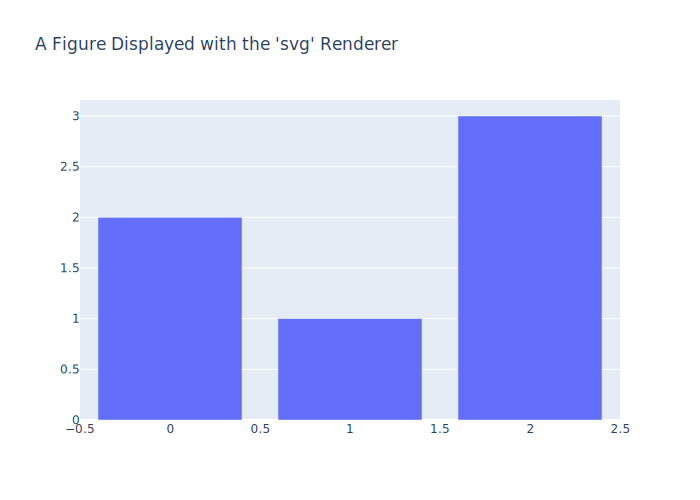

In [6]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'svg' Renderer"
)
fig.show(renderer="svg")

## 内置的渲染器

在本节中，我们将描述内置渲染器，以便您可以选择最适合您需要的渲染器。

### 交互式渲染器

交互式渲染器使用 `plotly.js` JavaScript 库显示图形，完全交互式，支持平移、缩放、悬停工具提示等。

#### `notebook`

这个渲染器是为了在经典的 [Jupyter Notebook](https://jupyter.org/install.html)（不是 JupyterLab）中使用。完整的 plotly.js JavaScript 库包会在第一次渲染图时被添加到笔记本中，所以这个渲染器可以在没有 Internet 连接的情况下工作。

这个渲染器对于将被导出为 HTML 文件的笔记本是一个很好的选择（使用 [nbconvert](https://nbconvert.readthedocs.io/en/latest/) 或 "Download as HTML" 菜单动作），因为导出的 HTML 文件可以在没有互联网连接的情况下工作。

```{tip}
将 `plotly.js` 包添加到笔记本会使笔记本的大小增加几兆字节。如果您可以一直依赖于 Internet 连接，那么如果笔记本大小是一个限制，您可能需要考虑使用 `notebook_connected` 渲染器。
```

#### `notebook_connected`

这个渲染器与 `notebook` 渲染器相同，除了 plotly.js JavaScript库 bundle 是从在线 CDN 位置加载的。这样可以节省几兆字节的笔记本大小，但为了显示以这种方式呈现的图，需要连接 Internet。

对于将与 [nbviewer](https://nbviewer.jupyter.org/) 共享的笔记本来说，这个渲染器是一个很好的选择，因为用户首先必须有一个活跃的互联网连接来访问 nbviewer。

#### `kaggle` 和 `azure`

这些都是 `notebook_connected` 的别名，因为这个渲染器是 [Kaggle 内核](https://www.kaggle.com/docs/notebooks) 和 [Azure Notebook](https://notebooks.azure.com/) 的很好的选择。

#### `colab`

这是一个用于 [谷歌 Colab](https://colab.research.google.com) 的自定义渲染器。

#### `browser`

该渲染器将使用默认的 web 浏览器在浏览器选项卡中打开一个图。此渲染器只能在 Python 内核运行在与 web 浏览器相同的本地机器上时使用，因此它与 Jupyter Hub 或在线笔记本服务不兼容。

```{note}
1. 在这个上下文中，“默认浏览器”是由 Python [`webbrowser`](https://docs.python.org/3.7/library/webbrowser.html) 模块选择的浏览器。
2. 浏览器渲染器通过在本地端口上设置一个单独使用的本地 web 服务器来工作。由于图形一旦发送给浏览器，web 服务器就会立即关闭，因此刷新浏览器将无法恢复图形。
```

#### `firefox`、`chrome` 和 `chromium`

这些渲染器与浏览器渲染器相同，但是它们强制使用特定的浏览器。

#### `iframe` 和 `iframe_connected`

这些渲染器将图编写为独立的 HTML 文件，然后显示引用这些 HTML 文件的 [`iframe`](https://www.w3schools.com/html/html_iframe.asp) 元素。`iframe` 渲染器将包含 plotly.js JavaScript 包在每个被写的 HTML 文件中，而 `iframe_connected` 渲染器只包含一个在线 CDN 位置的引用，从那里加载 plotly.js。因此，`iframe_connected` 渲染器输出的文件比 `iframe` 渲染器小，但它需要 Internet 连接，而 `iframe` 渲染器可以脱机操作。

这个渲染器在处理笔记本时可能比包含很多大图更有用。当使用 `notebook` 或 `notebook_connected` 渲染器时，一个笔记本中所有图的所有数据都内联存储在笔记本本身中。如果这将导致一个非常大的笔记本，可以使用 `iframe` 或 `iframe_connected` 渲染器代替。使用 `iframe` 渲染器，图形数据存储在单独的 HTML 文件中，而不是存储在笔记本本身中，从而使笔记本的大小更小。

```{tip}
`iframe` 渲染器编写的 HTML 文件存储在名为 `iframe_figures` 的子目录中。HTML 文件的名称是根据产生该图形的笔记本单元格的执行编号来命名的。这意味着每次重新启动笔记本内核时，之前的 HTML 文件都会被覆盖。这也意味着您不应该在同一个目录中使用 `iframe` 渲染器存储多个笔记本，因为这可能导致来自一个笔记本的数据覆盖来自另一个笔记本的数据。
```

#### `plotly_mimetype`

`plotly_mimetype` 渲染器创建图形的规范（称为 MIME 类型包），并请求当前用户界面显示它。支持此渲染器的用户界面包括 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/)（需要 [`plotlywidget`](https://www.npmjs.com/package/plotlywidget) 扩展）、[nteract](https://nteract.io/) 和 Visual Studio Code [笔记本界面](https://code.visualstudio.com/docs/python/jupyter-support)。

#### `jupyterlab`、`nteract` 和 `vscode`

这些都是 `plotly_mimetype` 的别名，因为在使用 JupyterLab、nteract 和 Visual Studio Code 笔记本界面时，这个渲染器是一个很好的选择。注意，在 VSCode 笔记本中，Plotly.js 的版本是由 [vscode-python extension](https://code.visualstudio.com/docs/languages/python) 扩展提供的，通常会比最新版本晚几个星期，所以 `plotly` 的最新特性可能不会立即在 VSCode 中可用。Nteract 的情况类似。

### 静态图像渲染器

提供了一组渲染器，用于将图显示为静态图像。这些渲染器都依赖于 [orca](https://github.com/plotly/orca) 静态图像输出工具。请参阅[静态图像导出](https://plot.ly/python/static-image-export/)页面以获得更多关于[orca]的设置信息。

#### `png`、`jpeg` 和 `svg`

这些渲染器分别将图形显示为静态的 `.png`、`.jpeg` 和 `.svg` 文件。这些渲染器对于不支持内联 HTML 输出但支持内联静态图像的用户界面非常有用。例子包括 [QtConsole](https://qtconsole.readthedocs.io/en/stable/)、[Spyder](https://www.spyder-ide.org/) 和 [PyCharm 笔记本界面](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html)。

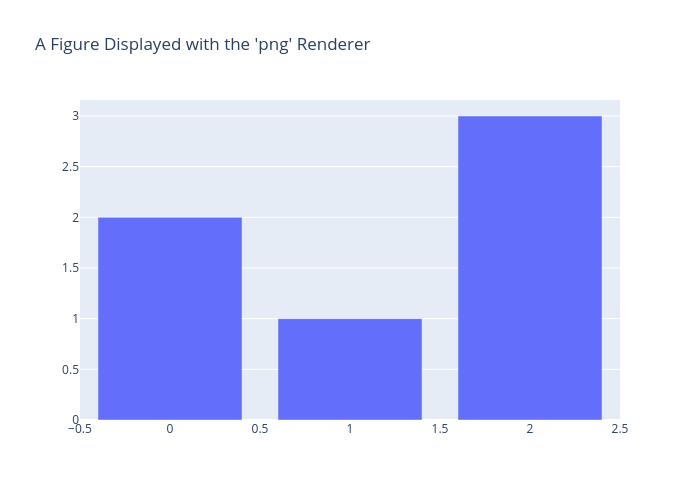

In [7]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show(renderer="png")

#### PDF

这个渲染器将图形显示为静态 PDF 文件。这对于将使用 [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/) 的 LaTeX 导出功能导出为 PDF 文件的笔记本电脑特别有用。

#### 其他杂项渲染器

##### JSON

在支持它的编辑器中（JupyterLab、nteract 和 Visual Studio Code 笔记本界面），这个渲染器以可折叠的交互式树结构显示图形的 JSON 表示形式。这对于检查复杂的结构是非常有用的。

#### 多个渲染器

您可以指定多个渲染器应该使用 `"+"` 字符连接它们的名称。当编写需要支持多个上下文的代码时，这很有用。例如，如果一个笔记本指定了一个默认的渲染器字符串 `"notebook+plotly_mimetype+pdf"`，那么这个笔记本将能够在经典的 Jupyter notebook 中运行，在 JupyterLab 中，并且它将支持使用 `nbconvert` 导出为 PDF。

### 自定义内置渲染器

大多数内置渲染器都有配置选项来定制它们的行为。要查看渲染器的描述，包括它的配置选项，可以在 `plotly.io.renderers` 配置对象上使用字典样式的键查找来访问渲染器对象，然后显示它。下面是一个访问和显示 `png` 渲染器的例子。

In [8]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer

PngRenderer(width=None, height=None, scale=None, engine='auto')

    Renderer to display figures as static PNG images.  This renderer requires
    either the kaleido package or the orca command-line utility and is broadly
    compatible across IPython environments (classic Jupyter Notebook, JupyterLab,
    QtConsole, VSCode, PyCharm, etc) and nbconvert targets (HTML, PDF, etc.).

    mime type: 'image/png'
    

从这个输出中，你可以看到 `png` 渲染器支持 3 个属性：`width`，`height` 和 `scale`。您可以通过向这些属性分配新值来自定义它们。

下面是一个自定义 `png` 渲染器来更改结果图像大小的示例，将 `png` 渲染器设置为默认值，然后显示一个图。

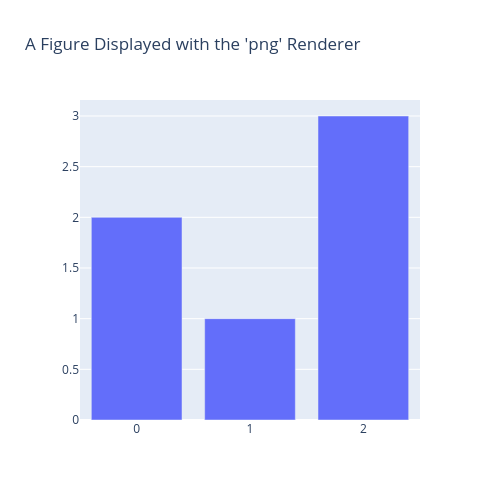

In [9]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

您还可以通过将它们作为关键字参数传递给 `show()` 方法来临时覆盖渲染器参数的值。例如

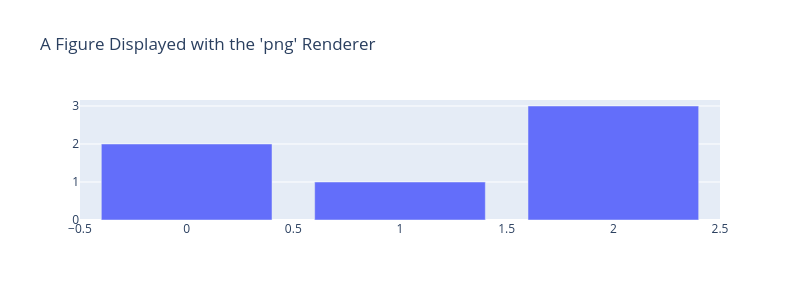

In [10]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show(renderer="png", width=800, height=300)

## 使用 `ipywidgets` 显示图

Plotly 图形可以使用 `plotly.graph_objects.FigureWidget` 对象在 [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) 上下文中显示。`FigureWidget` 是一个 figure graph 对象（就像 `plotly.graph_objects.Figure` 一样），因此您可以向它添加跟踪并像常规的 figure 一样更新它。但是 `FigureWidget` 也是一个 `ipywidgets` 对象，这意味着您可以将其与其他 `ipywidgets` 一起显示，从而在笔记本中构建用户界面。

有关将 `plotly.py` 图与 `ipywidgets` 集成的更多信息，请参阅 [Plotly FigureWidget 概述](https://plot.ly/python/figurewidget/)。

```{important}
`FigureWidget` 不使用上面讨论的渲染器框架，因此不应该在 `FigureWidget` 对象上使用 `show()` figure 方法或 `plotly.io.show` 函数。
```